# 4.데이터 탐색 이해와 실무
### 4.2 일변량 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 실습활용을 위한 sklearn 패키지 내 보스턴 주택가격 데이터 로딩
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = load_boston()

In [4]:
# 데이터프레임 생성 및 Merge
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['MEDV'])

housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

# 데이터 copy
housing_data = housing.copy()

### 데이터 컬럼 설명
#### 보스턴 인근 Town 별 주택 가격 및 관련 정보 데이터셋

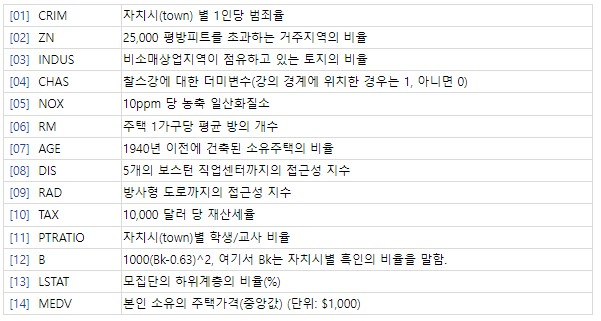

In [6]:
from IPython.display import Image
Image("C:/Users/qctum/boston_columns.jpg")

### 범주형 일변량 시각화
 * 파이차트
 * 막대그래프

In [7]:
# 데이터 통계량 확인
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# 파이차트(Pie Chart) 실습
# 실습을 위해 범주형 데이터로 전환
bins = [0, 20, 40, 60, 80, 100]
names = ["G1", "G2", "G3", "G4", "G5"]
housing_data['AGE_G5'] = pd.cut(housing_data['AGE'], bins, labels=names)
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_G5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,G4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,G4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,G4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,G3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,G4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,G4
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,G5
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,G5


In [12]:
# 파이차트(Pie Chart) 생성을 위해 빈도 lable 생성
pie_df_G5 = pd.DataFrame(housing_data['AGE_G5'].value_counts())
# pie 차트 생성 시 범주 별 크기에 따른 sorting 후 plotting
pie_df_G5

,AGE_G5
G5,240
G4,81
G3,76
G2,75
G1,34


<Axes: ylabel='AGE_G5'>

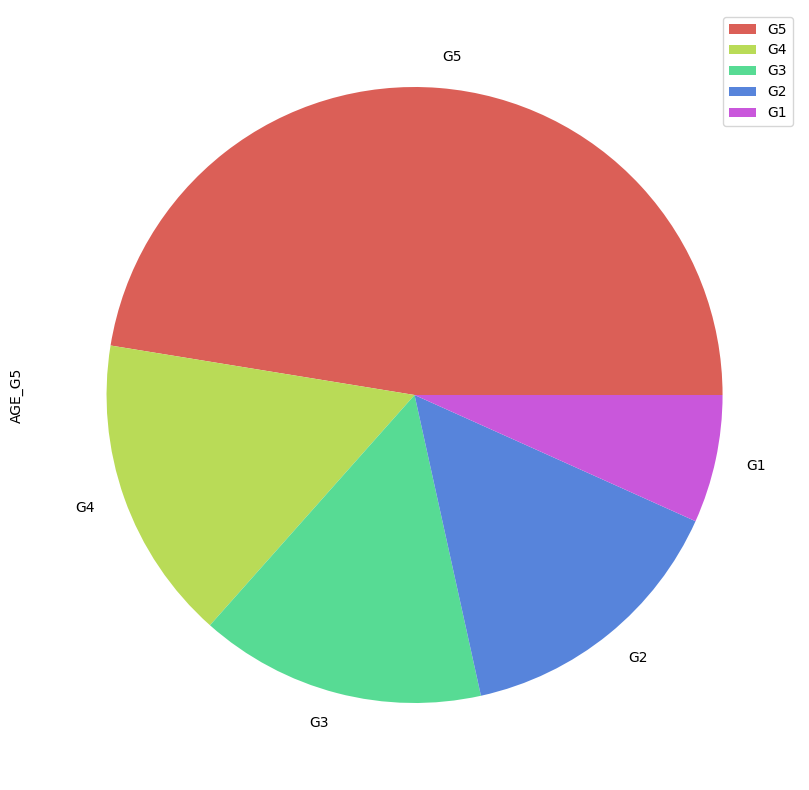

In [14]:
# 파이차트 생성
pie_df_G5.plot.pie(y='AGE_G5', figsize=(10, 10), colors=sns.color_palette('hls', len(pie_df_G5)))

 * G1에서 G5까지 범주형 숫자가 클수록 Town 내 오래된 주택의 비율이 많음을 의미함
 * G5 (Town 내 80% 이상이 1940년도 이전 건축된 건물)의 비율이 가장 크고, G1(Town 내 20% 이하가 1940년도 이전 건축된 건물)이 가장 적음

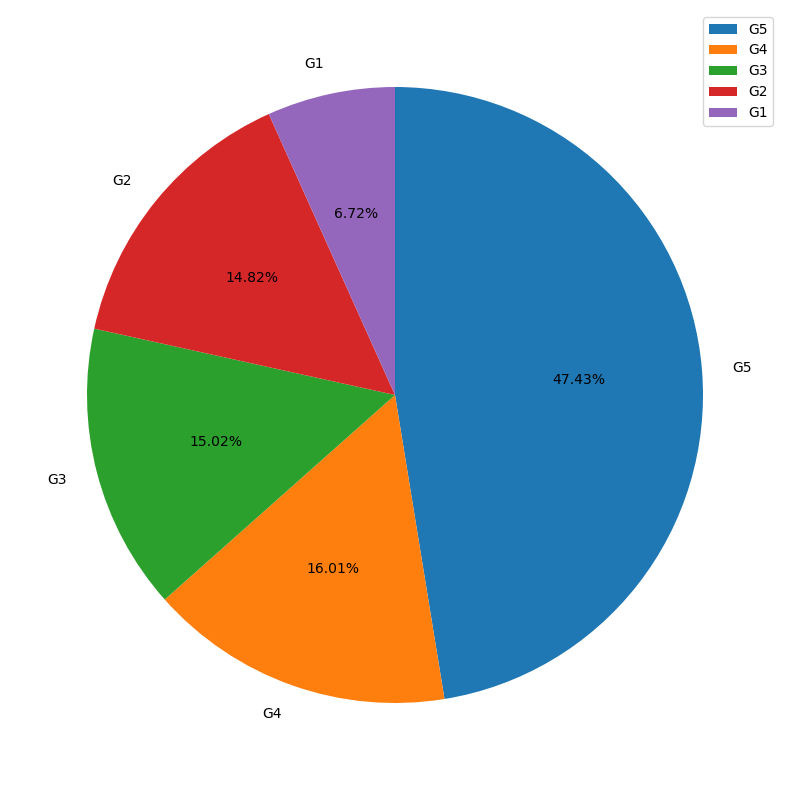

In [15]:
# matplotlib 으로 차트 생성 시 더 많은 옵션의 시각화 가능
# 파이차트 생성
plt.figure(figsize=(10,10))

plt.pie(pie_df_G5['AGE_G5'], ## 차트 출력
       labels=pie_df_G5.index, ## label 출력
       startangle=90, ## 시작점을 90도 지정
       counterclock=False, ## 시계 방향
       autopct='%.2f%%') ## 퍼센티지 출력
plt.legend() #legend(범례) 삽입
plt.show()

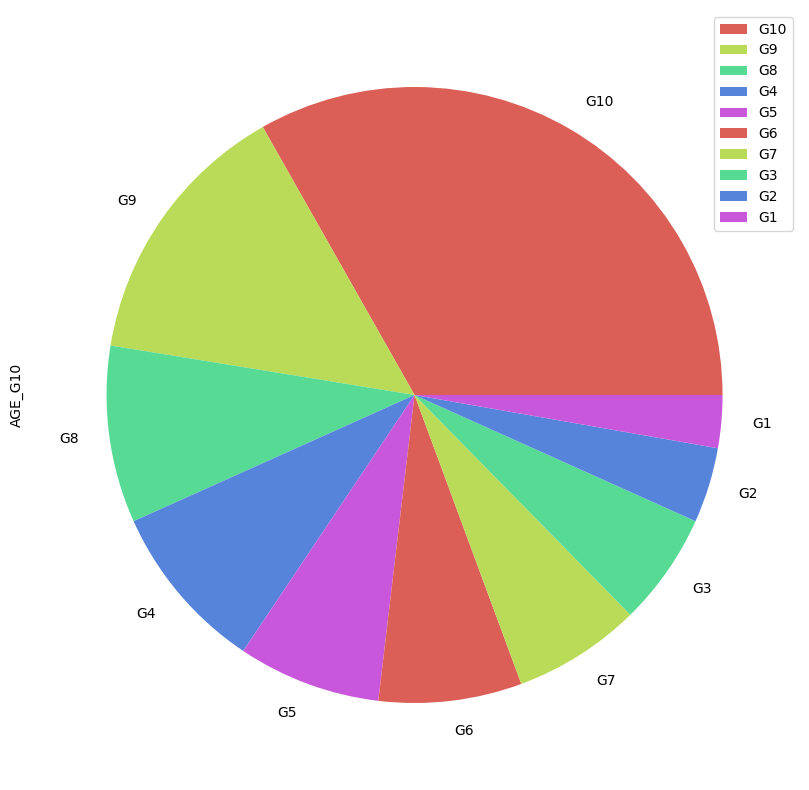

In [18]:
# 범주형 데이터를 좀 더 세분화 하여 변환
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
housing_data['AGE_G10']= pd.cut(housing_data['AGE'], bins, labels=names)

# 파이차트 생성을 위한 빈도 label 생성
pie_df_G10 = pd.DataFrame(housing_data['AGE_G10'].value_counts())

# 파이차트 생성
pie_df_G10.plot.pie(y='AGE_G10', figsize=(10, 10), colors=sns.color_palette('hls', len(pie_df_G5)))
plt.show()

 * 5개가 범주인 경우보다, 범주 별 비교가 어려움
 * G4 ~ G7까지 대부분 비율이 유사하게 보이므로 비교가 쉽지 않음
 * 데이터 크기가 유사할 경우, 막대그래프를 통해 차이를 비교할 수 있음

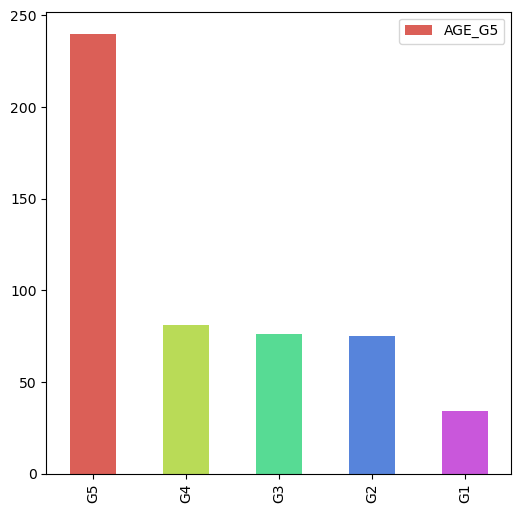

In [21]:
# 막대그래프(Bar Chart) 실습
# 막대그래프 생성
pie_df_G5.plot.bar(y='AGE_G5', figsize=(6, 6), color = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

<Axes: ylabel='AGE_G5'>

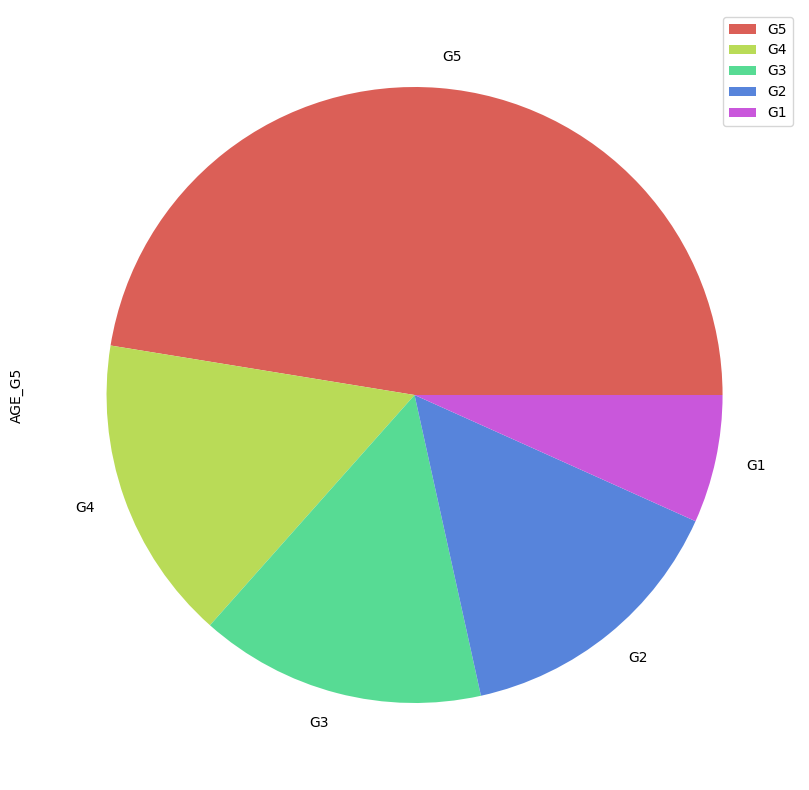

In [22]:
# 파이차트와 비교
pie_df_G5.plot.pie(y='AGE_G5', figsize=(10, 10), colors=sns.color_palette('hls', len(pie_df_G5)))

<Axes: >

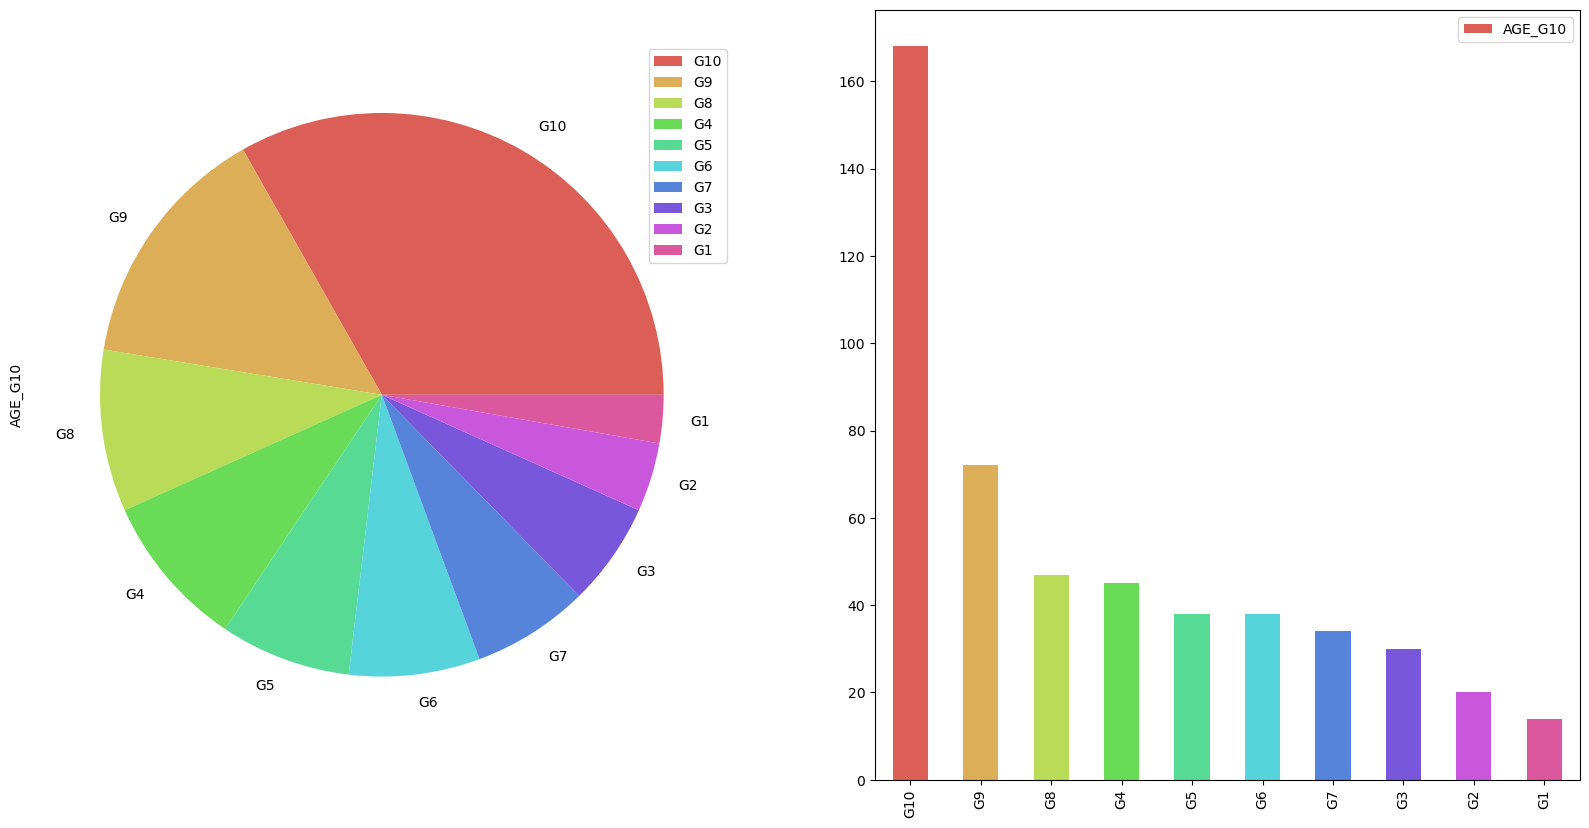

In [23]:
# 막대그래프와 파이차트 비교
# 그래프 생성
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

pie_df_G10.plot.pie(y='AGE_G10', colors = sns.color_palette('hls', len(pie_df_G10)), ax=ax[0]) #파이차트
pie_df_G10.plot.bar(y='AGE_G10', color = sns.color_palette('hls', len(pie_df_G10)), ax=ax[1]) #막대차트

 * G4, G5, G6, G7의 비교가 어려운 파이차트 대비, 막대그래프에서는 비교가 가급적 수월

In [24]:
pie_df_G10

,AGE_G10
G10,168
G9,72
G8,47
G4,45
G5,38
G6,38
G7,34
G3,30
G2,20
G1,14


### 연속형 일변량 시각화
 * 히스토그램
 * 커널밀도그래프
 * 박스플롯

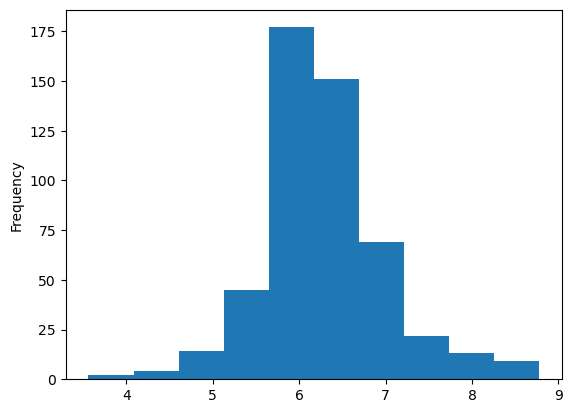

In [27]:
## 히스토그램 시각화
housing_data["RM"].plot.hist()
plt.show()

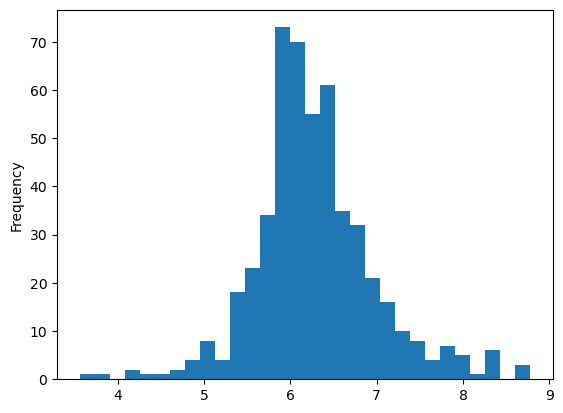

In [28]:
# 구간을 세분화하여 시각화
housing_data["RM"].plot.hist(bins=30)
plt.show()

 * 막대그래프와 유사한 모양을 지니고 있지만 사용 목적과 그래프의 형태 차이를 보임
 * 연속형인 RM(평균 방 개수) 변수의 분포를 세분화하여 구간으로 표현

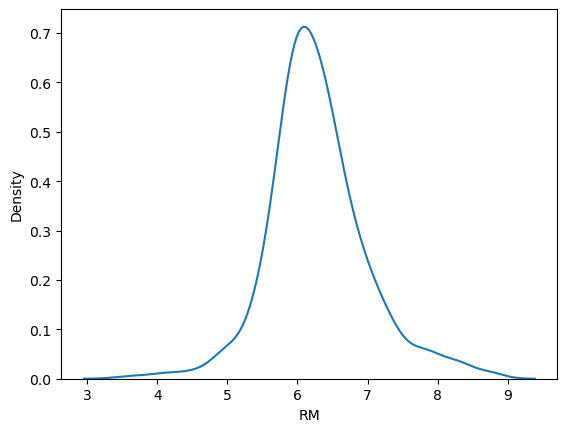

In [29]:
# 커널밀도추정 시각화
sns.kdeplot(housing_data["RM"])
plt.show()

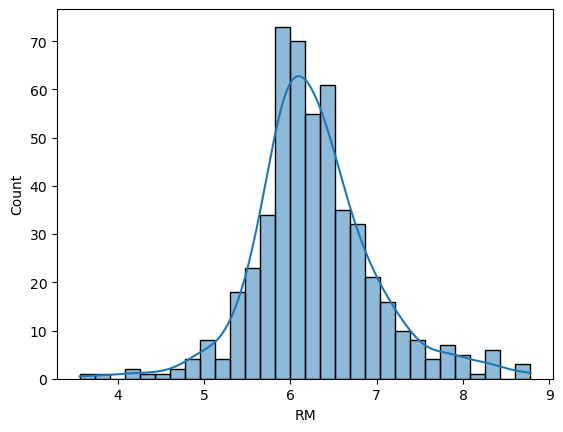

In [30]:
# 히스토그램 및 kde와 함께 시각화
sns.histplot(housing_data["RM"], bins=30, kde=True)
plt.show()

 * 관측된 RM 변수를 기반으로 커널밀도추정 결과의 시각화
 * 히스토그램의 분포를 완만한 곡선으로 표현
 * 비시각화와 달리 시각화는 실제 데이터의 분포를 좀 더 쉽게 확인 가능

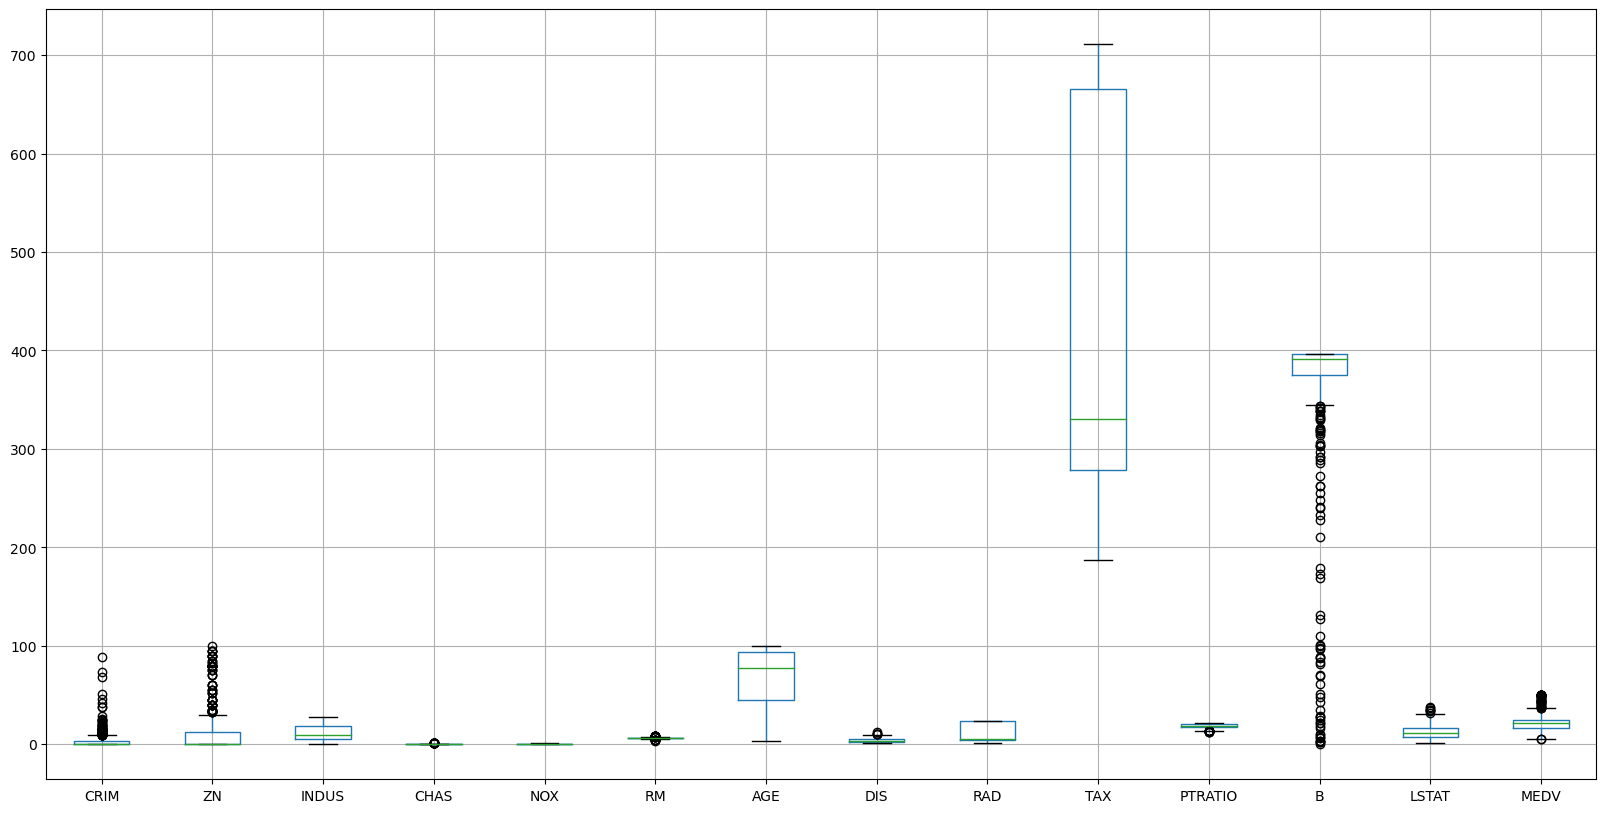

In [31]:
# Box plot 시각화
housing_data.boxplot(figsize=(20, 10))
plt.show()

 * 변수 별 관측치 범위가 모두 다르기 때문에 개략적 파악 가능
 * 개별 변수 별 Box plot 시각화 필요

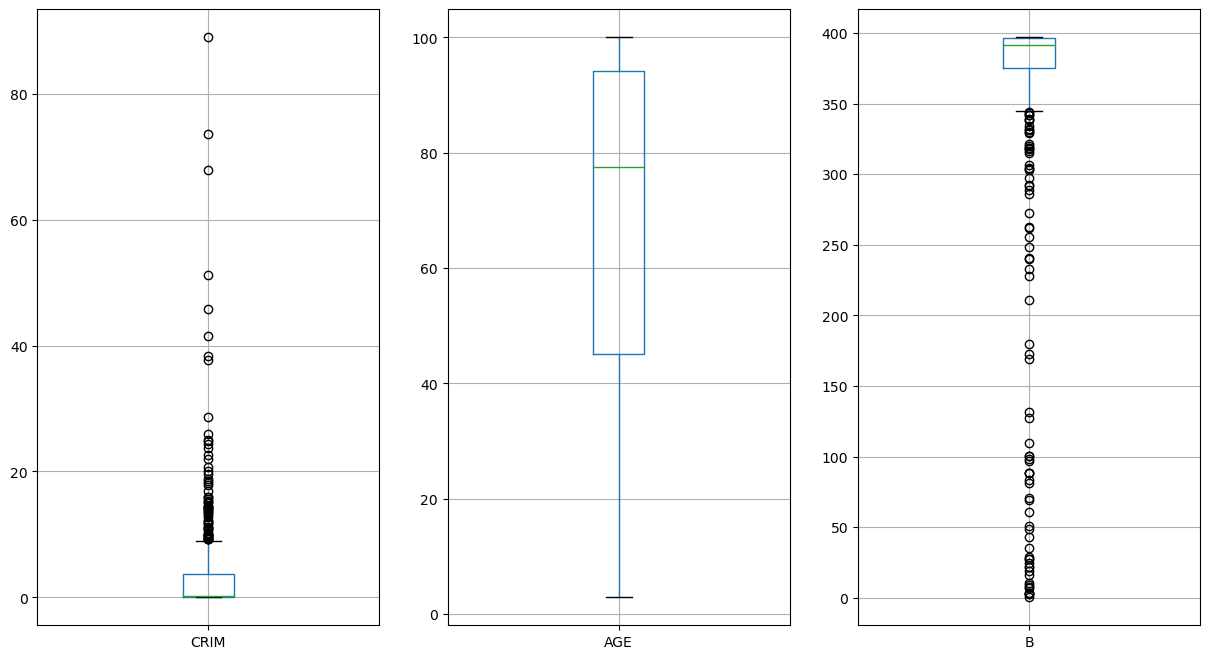

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [33]:
# 개별 변수 별 시각화
fig, ax = plt.subplots(ncols = 3, figsize=(15, 8))

housing_data[['CRIM']].boxplot(ax=ax[0])
housing_data[['AGE']].boxplot(ax=ax[1])
housing_data[['B']].boxplot(ax=ax[2])

plt.show()

print(housing_data['AGE'].describe())

 * 박스플롯 시각화를 기반으로 중앙값을 비롯한 사분위수 및 이상치 확인에 용이
 * AGE 변수의 경우 IQR 기반의 이상치로 판단된 데이터가 없음(최대값: 100, 최소값: 2.9)

In [34]:
q1 = housing_data['AGE'].quantile(0.25)
q3 = housing_data['AGE'].quantile(0.75)
IQR = q3-q1
print('min|mum: ', q1-1.5*IQR)
print('max|mum: ', q3+1.5*IQR)

min|mum:  -28.54999999999999
max|mum:  167.64999999999998
